# Women's Shoe Prices:

This is a list of 10,000 women's shoes and their product information provided by Datafiniti's Product Database.
The dataset includes shoe name, brand, price, and more. Each shoe will have an entry for each price found for it and some shoes may have multiple entries.
Questions to be answered:

a. What is the average price of each distinct brand listed? 

b. Which brands have the highest prices? 

c. Which ones have the widest distribution of prices? 

d. Is there a typical price distribution (e.g., normal) across brands or within specific brands?

In [ ]:
# Import python libraries for data wrangling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
% matplotlib inline %

In [3]:
shoes_one = pd.read_csv("Datafiniti_Womens_Shoes.csv")
shoes_two = pd.read_csv("Datafiniti_Womens_Shoes_Jun19.csv")
#shoes_three =  pd.read_csv("7210_1.csv")

In [4]:
print("There are {} rows and {} columnns in the first dataset".format(shoes_one.shape[0],   shoes_one.shape[1]))
#print("There are {} rows and {} columnns in the second dataset".format(shoes_two.shape[0],   shoes_two.shape[1]))

There are 10000 rows and 34 columnns in the first dataset


In [5]:
print("There are {} null values in the sourceURLs column".format(shoes_one['prices.sourceURLs'].isnull().sum()))
print("There are {} null values in the merchant column".format(shoes_one['prices.merchant'].isna().sum()))
#print("There are {} null values in the sourceURLs column".format(shoes_two['prices.sourceURLs'].isna().sum()))
#print("There are {} null values in the merchant column".format(shoes_two['prices.merchant'].isna().sum()))

There are 0 null values in the sourceURLs column
There are 9565 null values in the merchant column


In [10]:
cols = ['id', 'brand', 'categories', 'prices.amountMax','prices.amountMin', 'prices.size', 'prices.sourceURLs']
shoes_one = shoes_one[cols]
shoes_one.columns = ['id', 'brand', 'categories', 'Max','Min', 'Size', 'SourceURLs']

In [11]:
def parse_url(data):
    '''
    Method to extract the domain name from the url column
    Parameter
    data: value form url column
    Returns
    domain name
    '''
    domain = urlparse(data).netloc
    domain = domain.split(".")[1:]
    host = ".".join(domain)
    return host

We neeed to extract the merchant name from the url, as we will like to the see the shoe sales spread across the merchants

In [12]:
shoes_one['Merchant'] = shoes_one['SourceURLs'].apply(parse_url)

In [13]:
# How many unique brands
print("There are {} unique brands in the dataset".format(shoes_one['brand'].nunique()))
# How many unique categories
print("There are {} unique categories in the dataset".format(shoes_one['categories'].nunique()))
# How many unique merchants
print("There are {} unique merchants in the dataset".format(shoes_one['Merchant'].nunique()))

There are 129 unique brands in the dataset
There are 207 unique categories in the dataset
There are 5 unique merchants in the dataset


In [14]:
# What is the price range in the dataset
shoes_one.loc[:,'Range'] = shoes_one['Max'] - shoes_one['Min']

In [15]:
#What is the average price of each distinct brand listed?
shoes_one.loc[:,'Average'] = (shoes_one['Max'] + shoes_one['Min'])/2

In [16]:
#Which brands have the highest prices?
highest_prices = shoes_one.groupby('brand').max()["Max"]
highest = highest_prices[highest_prices == highest_prices.max()]
print("The most expensive brand is {} with a price of ${}".format(next(highest.iteritems())[0],next(highest.iteritems())[1]))

The most expensive brand is Red Wing with a price of $359.95


In [17]:
#Which brand is the cheapest the highest prices?
lowest_prices = shoes_one.groupby('brand').min()["Min"]
lowest = lowest_prices[lowest_prices == lowest_prices.min()]
print("The least expensive brand is {} with a price of ${}".format(next(lowest.iteritems())[0],next(lowest.iteritems())[1]))

The least expensive brand is Unbranded with a price of $4.88


In [18]:
group_retrieval = shoes_one.groupby(['Merchant']).size().to_frame('size')

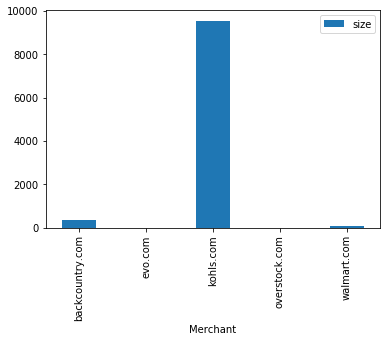

In [19]:
group_retrieval.plot(kind = 'bar')

In [20]:
group_retrieval = group_retrieval.reset_index()

In [21]:
#group_retrieval[group_retrieval['Merchant'] == 'kohls.com']
group_retrieval['%'] = round((group_retrieval['size']/ group_retrieval['size'].sum()) * 100, 1)

In [22]:
group_retrieval

,Merchant,size,%
0,backcountry.com,352,3.5
1,evo.com,8,0.1
2,kohls.com,9556,95.6
3,overstock.com,2,0.0
4,walmart.com,82,0.8


The plot above shows that most of the shoes in the dataset were listed on Kohls.com, with 95.6% of all shoes

Text(0.5, 1.0, 'Average price by Merchant')

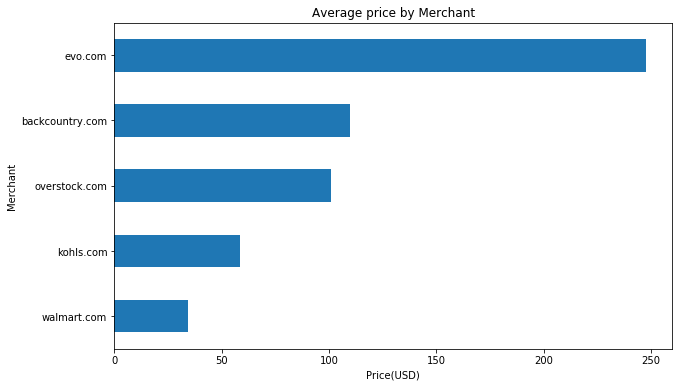

In [33]:
# Average price per Merchant
merchant_average = shoes_one.groupby('Merchant')['Average'].mean().sort_values(ascending=False)
ax = merchant_average.plot(kind='barh', figsize=(10, 6))
ax.invert_yaxis()
plt.xlabel('Price(USD)')
plt.title('Average price by Merchant')

Text(0.5, 1.0, 'Merchant with widest range')

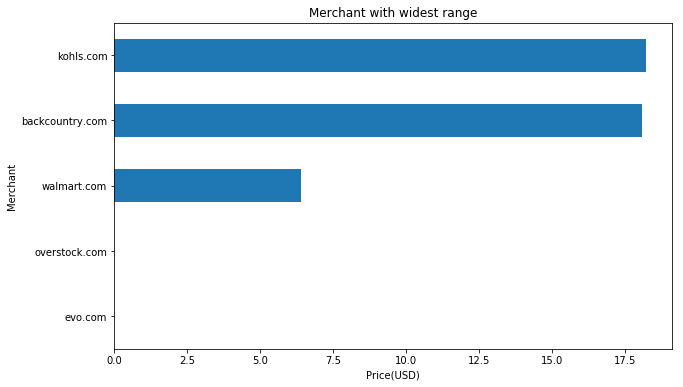

In [37]:
# Widest range of prices
merchant_range = shoes_one.groupby('Merchant')['Range'].mean().sort_values(ascending=False)
ax = merchant_range.plot(kind='barh', figsize=(10, 6))
ax.invert_yaxis()
plt.xlabel('Price(USD)')
plt.title('Merchant with widest range')

Text(0.5, 1.0, 'Average price by Brand')

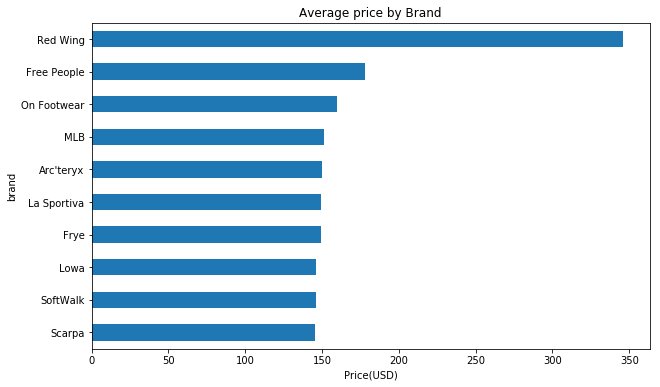

In [47]:
# Average price per brand
brand_average = shoes_one.groupby('brand')['Average'].mean().sort_values(ascending=False).head(10)
ax = brand_average.plot(kind='barh', figsize=(10, 6))
ax.invert_yaxis()
plt.xlabel('Price(USD)')
plt.title('Average price by Brand')

Text(0.5, 1.0, 'Brands with widest range')

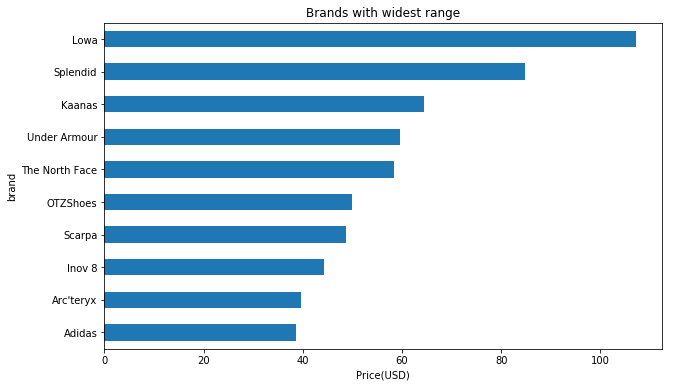

In [48]:
# Widest range of prices by brand
brand_range = shoes_one.groupby('brand')['Range'].mean().sort_values(ascending=False).head(10)
ax = brand_range.plot(kind='barh', figsize=(10, 6))
ax.invert_yaxis()
plt.xlabel('Price(USD)')
plt.title('Brands with widest range')

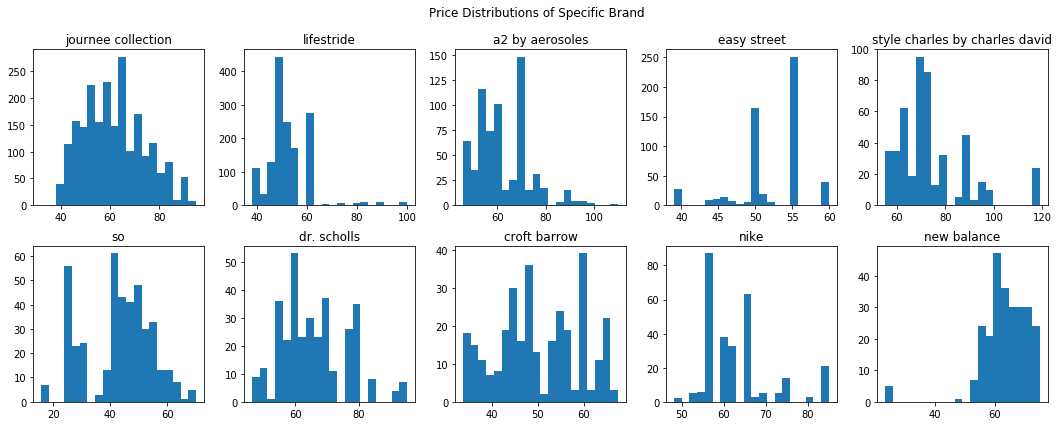

In [49]:
#Is there a typical price distribution (e.g., normal) across brands or within specific brands?
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for idx, brand in enumerate(shoes_one['brand'].value_counts()[0:10].index):
    axs[idx//5, idx%5].hist(shoes_one[shoes_one['brand'] == brand]['Average'], bins=20)
    axs[idx//5, idx%5].set_title(brand)
plt.suptitle('Price Distributions of Specific Brand')
plt.tight_layout()
fig.subplots_adjust(top=0.88)

There is no normal distribution in prices across brands. However, prices for Journee COllection seems to show normal distribution in prices.